In [1]:
import os.path as op
import os
# import sys
import numpy as np
import pandas as pd
import seaborn as sns
from fpdf import FPDF  

import mne
from mne.preprocessing import find_bad_channels_maxwell
import matplotlib.pyplot as plt
# from mne.time_frequency import psd_multitaper
from mne.preprocessing import annotate_muscle_zscore
from mne.preprocessing import ICA
from mne.preprocessing import read_ica
import scipy.stats

## Preprocessing

In [2]:


rawdir =  '/data/pt_02774/memory_grid/'


subject_list = ['mg15','mg16','mg17','mg18','mg19','mg20','mg21','mg22','mg23','mg24','mg25','mg26','mg27', 'mg28','mg30','mg31','mg32','mg33','mg34','mg36','mg38','mg40','mg41','mg44','mg45','mg46','mg47']

# subject_list = ['mg39']


In [3]:
subject_list = ['mg37']

subject_list = ['mg32']

In [ ]:
subject_list

In [4]:
# %load 03-run_ica.py
"""
===========
04. Run ICA
===========

Open issues:
    1. why the EEG-specific ICA gives only a few components?
    
"""


def run_ica(max_iter = 100, n_components = 0.99, random_state = 1):
    
    # stdout_obj = sys.stdout                 # store original stdout 
    # sys.stdout = open(op.join(out_path,     # open log file
    #                           os.path.basename(__file__) + "_%s.txt" % (site_id+subject_id)),'w')
    print('\n\n\n\n\n#######################################################################################')
    print("Processing subject: %s" % subject_id)
    run = 0
    for file_name in file_names:
        run = run + 1
        print("  File: %s" % file_name)
        
        # Read raw data
        raw_fname_in = op.join(out_path,
                               file_name + '_filter.fif')
        raw = mne.io.read_raw_fif(
            raw_fname_in, 
            preload=True, 
            verbose='error')
        
        # Downsample copy of raw
        raw_resmpl = raw.copy().resample(sfreq)
            
        # Band-pass filter raw copy
        raw_resmpl.filter(l_freq, h_freq)
            
        # Concatenate raw copies
        if run == 1:
            raw_resmpl_all = mne.io.concatenate_raws([raw_resmpl])
        else:
            raw_resmpl_all = mne.io.concatenate_raws([raw_resmpl_all, raw_resmpl])
        
        del raw, raw_resmpl
    
    ###################
    # ICA on MEG data #
    ###################
    
    # Prepare PDF report
    pdf = FPDF(orientation="P", unit="mm", format="A4")
    
    # Define ICA settings
    ica = ICA(method=ica_method,
              random_state=random_state,
              n_components=n_components,
              verbose=True)
    
    # Run ICA on filtered raw data
    ica.fit(raw_resmpl_all,
            picks='meg',
            verbose=True)
    
    # Plot timecourse of estimated sources
    fig = ica.plot_sources(raw_resmpl_all,
                           start=100,
                           show_scrollbars=False,
                           title='ICA_MEG')
    
    # for i in range(len(fig)):
    #     fname_fig = op.join(out_path, 
    #                         '05_rAll_ica_meg_src%d' % i)
    #     fig[i].savefig(fname_fig)
    #     plt.close(fig[i])

    fname_fig = op.join(out_path, 
                      "03_rAll_ica_meg_src.png")
    fig.savefig(fname_fig)
    plt.close(fig)
    
    '''
    # Add figure to report
    pdf.add_page()
    pdf.set_font('helvetica', 'B', 16)
    pdf.cell(0, 10, file_names[0][0:13] + ' - MEG')
    pdf.ln(20)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 10, 'Timecourse of MEG ICs', 'B', ln=1)
    pdf.image(fname_fig, 0, 45, pdf.epw)
    '''
    # Project mixing matrix on interpolated sensor topography
    fig = ica.plot_components(title='ICA_MEG')
    for i in range(len(fig)):
        fname_fig = op.join(out_path, 
                            '03_rAll_ica_meg_cmp%d.png' % i)
        fig[i].savefig(fname_fig)
        plt.close(fig[i])
        
        '''
        # Add figure to report
        pdf.add_page()
        pdf.set_font('helvetica', 'B', 16)
        pdf.cell(0, 10, file_names[0][0:13] + ' - MEG')
        pdf.ln(20)
        pdf.set_font('helvetica', 'B', 12)
        pdf.cell(0, 10, 'Topography of MEG ICs', 'B', ln=1)
        pdf.image(fname_fig, 0, 45, pdf.epw)
        
        '''
    # Save files
    ica_fname = op.join(out_path,
                        subject_id + 'ALL-ica_meg.fif')
    ica.save(ica_fname, overwrite=True)
    
    # Save report
    # pdf.output(op.join(out_path,
    #                   'run_ica' + '-reportMEG.pdf'))







#######################################################################################
Processing subject: mg32
  File: mg32a01
361 events found
Event IDs: [100 101 102 103 104 111 112 121 122 123]
361 events found
Event IDs: [100 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.6s finished


  File: mg32a02
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.5s finished


  File: mg32a03
361 events found
Event IDs: [100 101 102 103 104 111 112 121 122 123]
361 events found
Event IDs: [100 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.1s finished


  File: mg32a04
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.6s finished


  File: mg32a05
361 events found
Event IDs: [101 102 103 104 111 112 120 121 122 123]
361 events found
Event IDs: [101 102 103 104 111 112 120 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.5s finished


  File: mg32a06
362 events found
Event IDs: [ 96 101 102 103 104 111 112 121 122 123]
362 events found
Event IDs: [ 96 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.3s finished


  File: mg32b07
361 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
361 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.2s finished


  File: mg32b08
361 events found
Event IDs: [ 64 101 102 103 104 111 112 121 122 123]
361 events found
Event IDs: [ 64 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    3.2s finished


  File: mg32b09
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    3.0s finished


  File: mg32b10
361 events found
Event IDs: [ 96 101 102 103 104 111 112 121 122 123]
361 events found
Event IDs: [ 96 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    3.1s finished


  File: mg32b11
361 events found
Event IDs: [ 101  102  103  104  111  112  121  122  123 3840]
361 events found
Event IDs: [ 101  102  103  104  111  112  121  122  123 3840]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.3s finished


  File: mg32b12
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.5s finished


Fitting ICA to data using 306 channels (please be patient, this may take a while)
Omitting 25111 of 2241000 (1.12%) samples, retaining 2215889 (98.88%) samples.
Selecting by explained variance: 62 components
Fitting ICA took 392.6s.
Creating RawArray with float64 data, n_channels=62, n_times=2241000
    Range : 19600 ... 2260599 =     98.000 ... 11302.995 secs
Ready.
Using matplotlib as 2D backend.


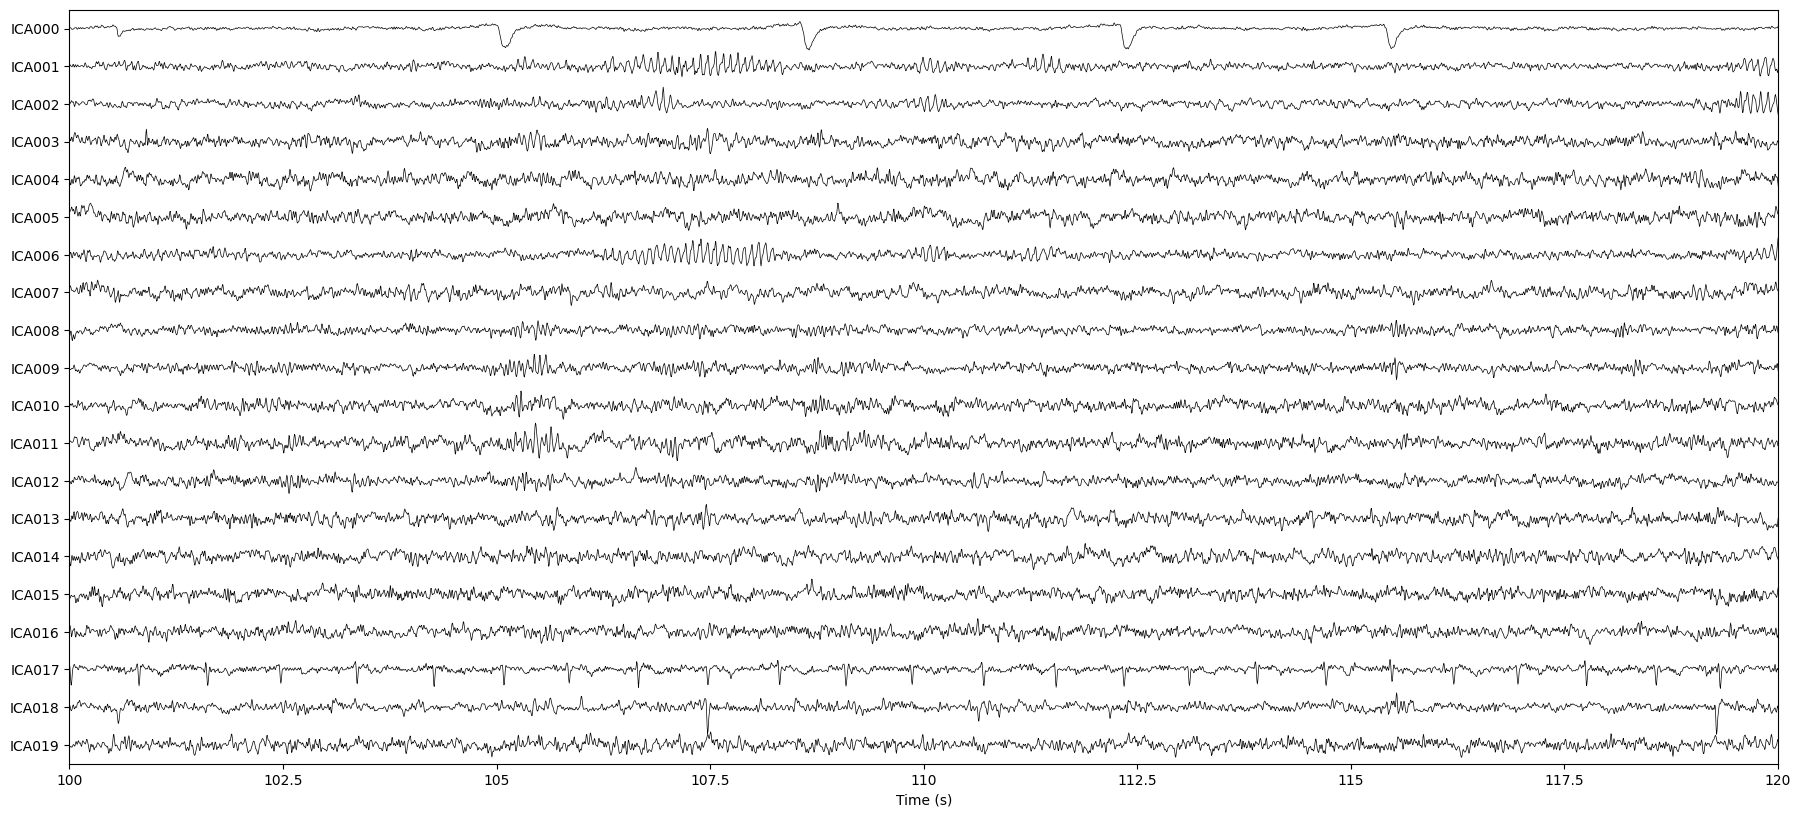

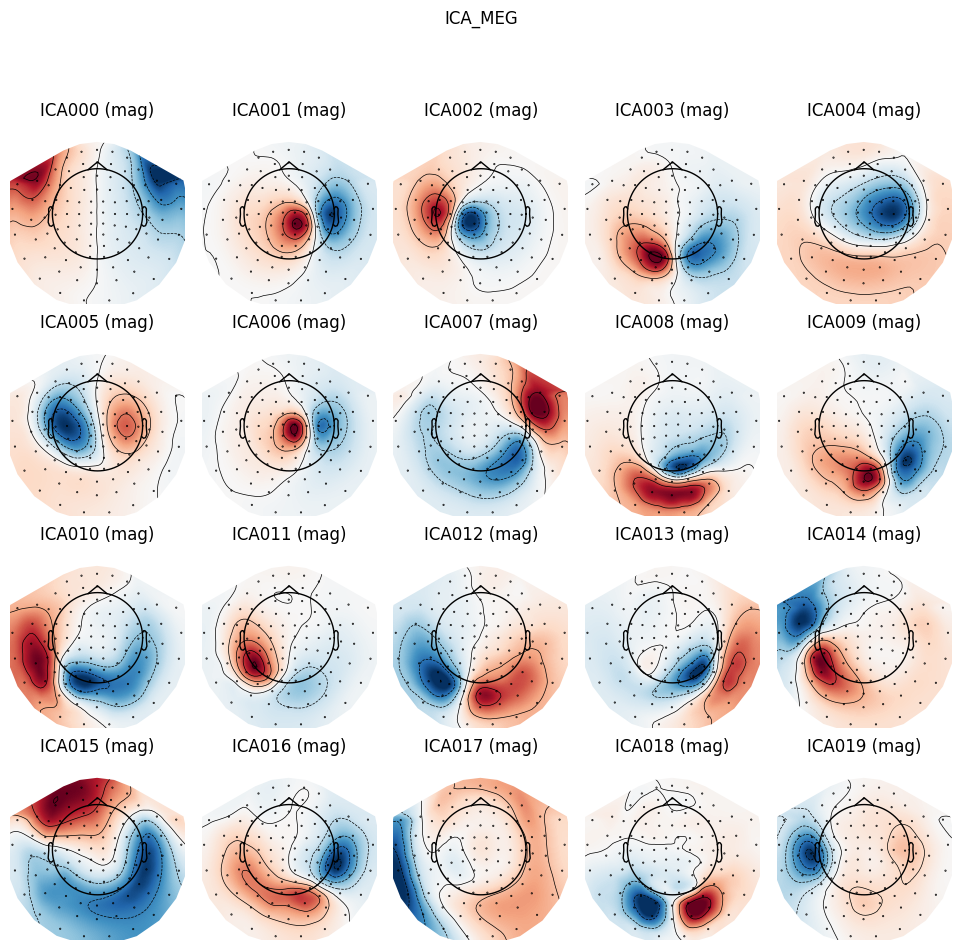

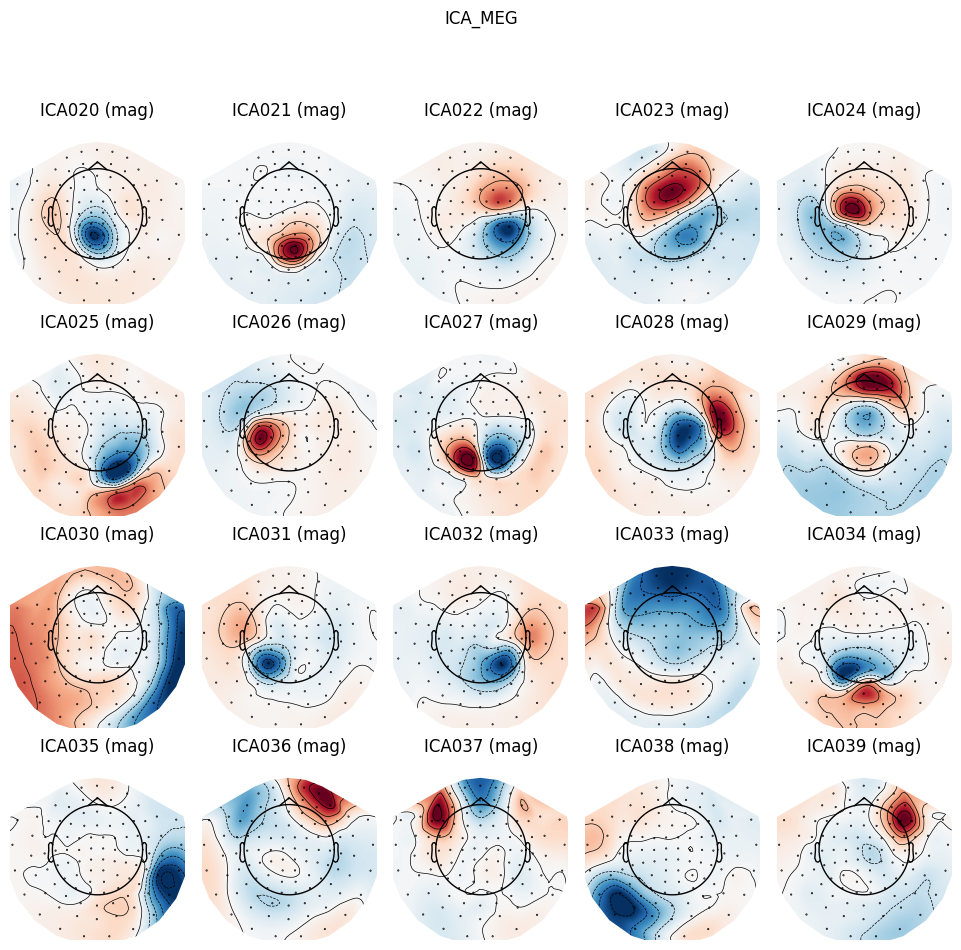

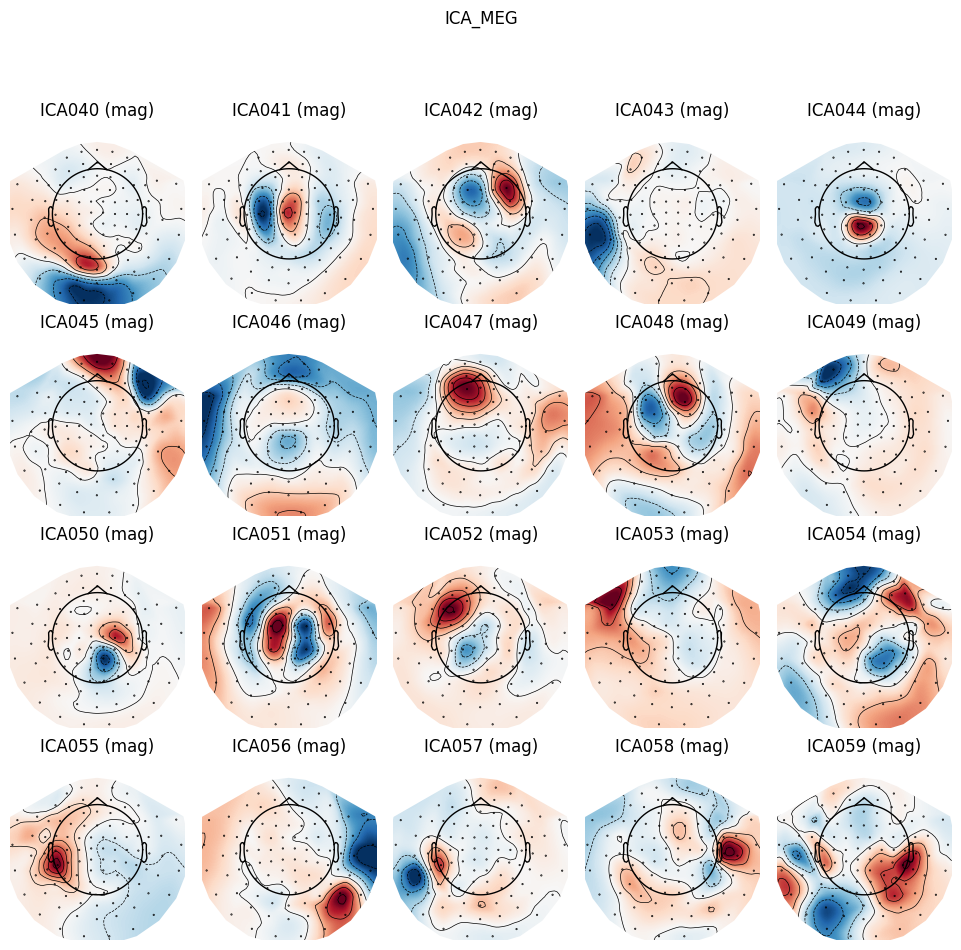

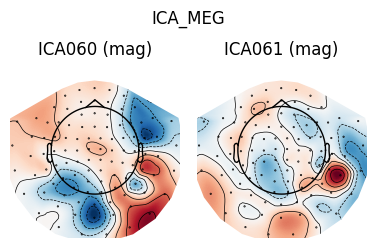

Overwriting existing file.
Writing ICA solution to /data/pt_02774/memory_grid/mg32/mg32ALL-ica_meg.fif...


/tmp/ipykernel_184498/1194223603.py:114: RuntimeWarning: This filename (/data/pt_02774/memory_grid/mg32/mg32ALL-ica_meg.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(ica_fname, overwrite=True)


In [5]:
# %load config.py
"""
===========
Config file
===========

Configurate the parameters of the study.
"""
for subject_id in subject_list[:]:

    # =============================================================================
    # SESSION-SPECIFIC SETTINGS
    # =============================================================================

    # Set filename based on experiment number
    data_path = os.path.join(rawdir,subject_id)
    file_exts = ['%sa01',
                     '%sa02',
                     '%sa03',
                     '%sa04',
                     '%sa05',
                     '%sa06',
                     '%sb07',
                     '%sb08',
                     '%sb09',
                     '%sb10',
                     '%sb11',
                     '%sb12']

    file_names = [f % (subject_id) for f in file_exts]


    # =============================================================================
    # GENERAL SETTINGS
    # =============================================================================

    # Set out_path folder or create it if it doesn't exist
    out_path = op.join(data_path)
    if not op.exists(out_path):
        os.mkdir(out_path)



    # =============================================================================
    # FILTERING AND DOWNSAMPLING SETTINGS
    # =============================================================================

    # Filter and resampling params
    l_freq = 1
    h_freq = 40
    sfreq = 200


    # =============================================================================
    # ICA SETTINGS
    # =============================================================================

    ica_method = 'fastica'
    n_components = 0.99
    max_iter = 800
    random_state = 1688


    # =============================================================================
    # RUN
    # =============================================================================

    
    run_ica(max_iter = max_iter, 
            n_components = n_components, 
            random_state = random_state)
    







#######################################################################################
Processing subject: mg37
  File: mg37b07
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.5s finished


  File: mg37b08
362 events found
Event IDs: [ 64  96 101 102 103 104 111 112 121 122 123]
362 events found
Event IDs: [ 64  96 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    3.0s finished


  File: mg37b09
361 events found
Event IDs: [ 96 101 102 103 104 111 112 121 122 123]
361 events found
Event IDs: [ 96 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    3.2s finished


  File: mg37b10
363 events found
Event IDs: [ 96 101 102 103 104 111 112 120 121 122 123]
363 events found
Event IDs: [ 96 101 102 103 104 111 112 120 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.3s finished


  File: mg37b11
361 events found
Event IDs: [ 96 101 102 103 104 111 112 121 122 123]
361 events found
Event IDs: [ 96 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.7s finished


  File: mg37b12
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.8s finished


  File: mg37c01
361 events found
Event IDs: [101 102 103 104 111 112 120 121 122 123]
361 events found
Event IDs: [101 102 103 104 111 112 120 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.8s finished


  File: mg37c02
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    3.0s finished


  File: mg37c03
361 events found
Event IDs: [100 101 102 103 104 111 112 121 122 123]
361 events found
Event IDs: [100 101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.5s finished


  File: mg37c04
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.5s finished


  File: mg37c05
362 events found
Event IDs: [100 101 102 103 104 111 112 120 121 122 123]
362 events found
Event IDs: [100 101 102 103 104 111 112 120 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.5s finished


  File: mg37c06
362 events found
Event IDs: [ 96 101 102 103 104 111 112 120 121 122 123]
362 events found
Event IDs: [ 96 101 102 103 104 111 112 120 121 122 123]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.5s finished


Fitting ICA to data using 306 channels (please be patient, this may take a while)
Omitting 15854 of 2107400 (0.75%) samples, retaining 2091546 (99.25%) samples.
Selecting by explained variance: 65 components
Fitting ICA took 532.4s.
Creating RawArray with float64 data, n_channels=65, n_times=2107400
    Range : 6600 ... 2113999 =     33.000 ... 10569.995 secs
Ready.
Using matplotlib as 2D backend.


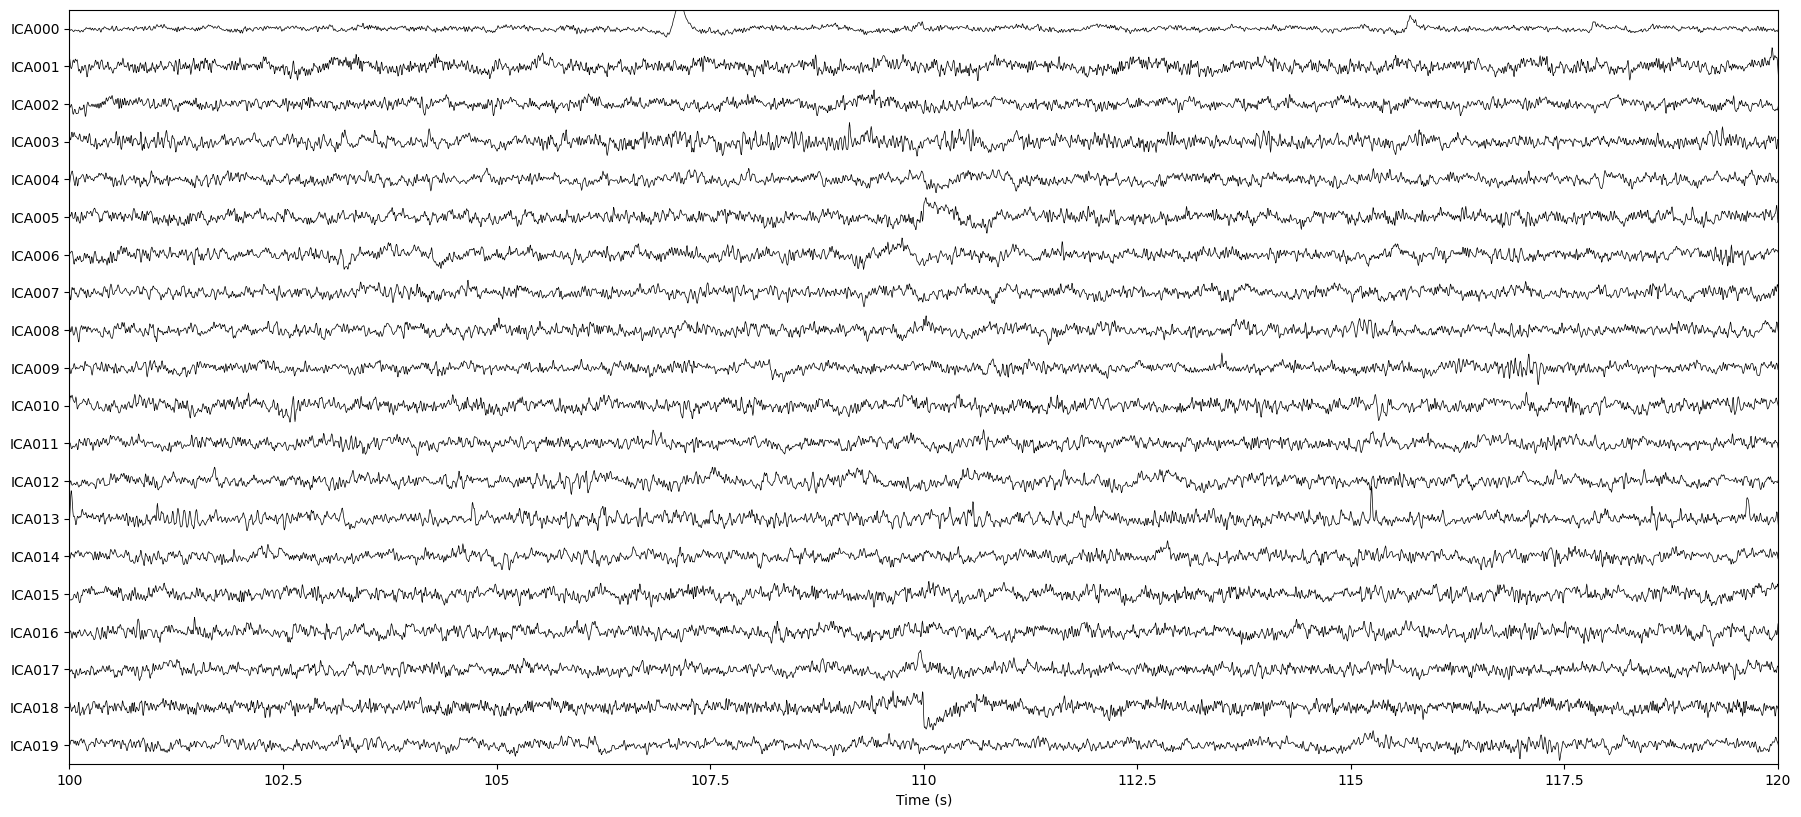

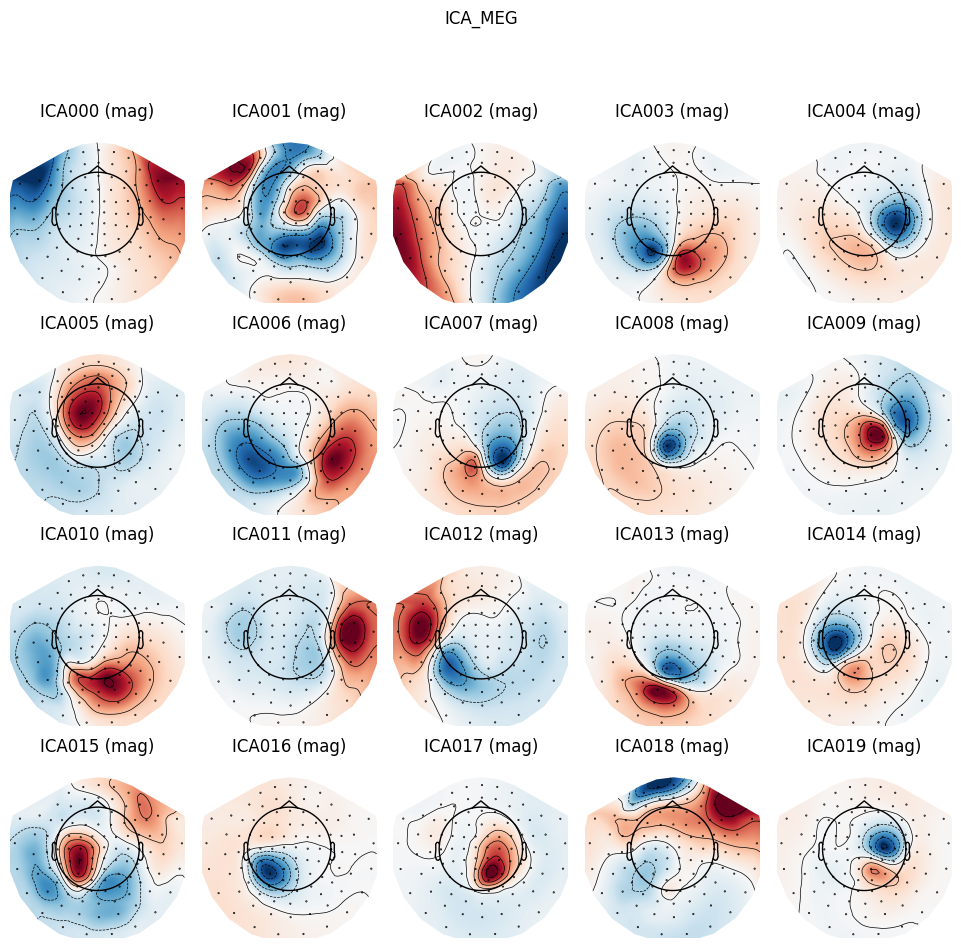

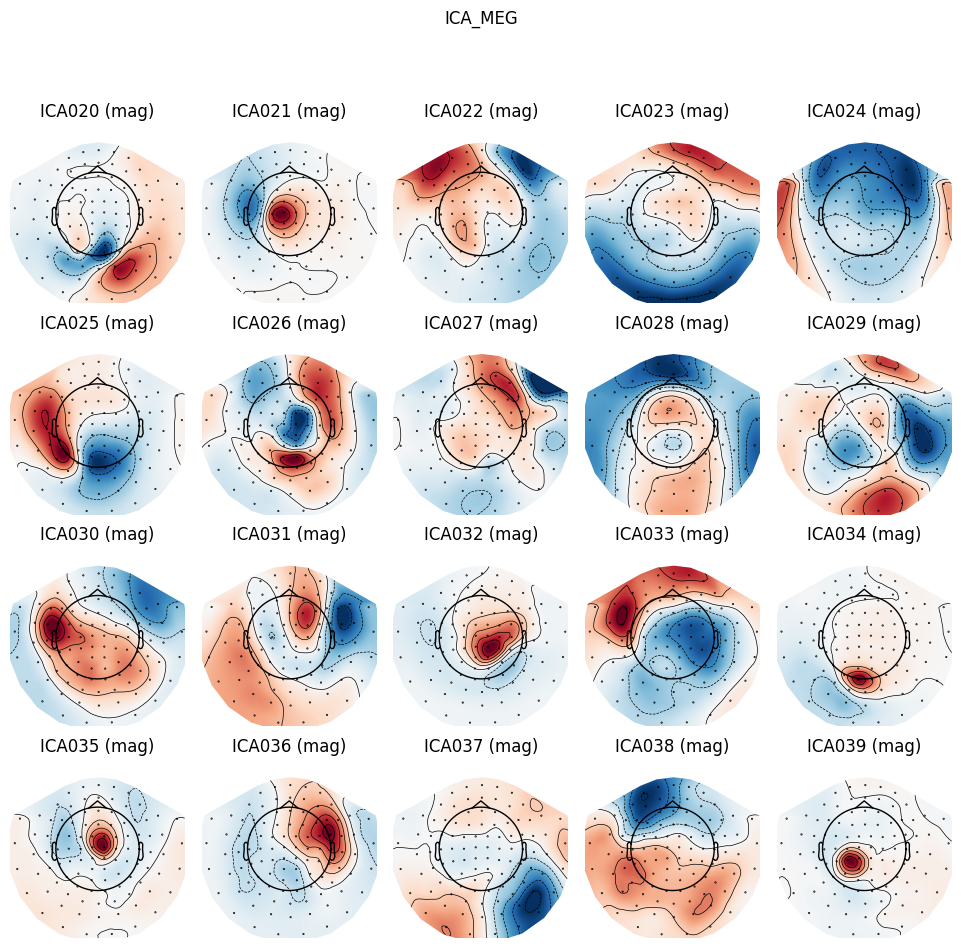

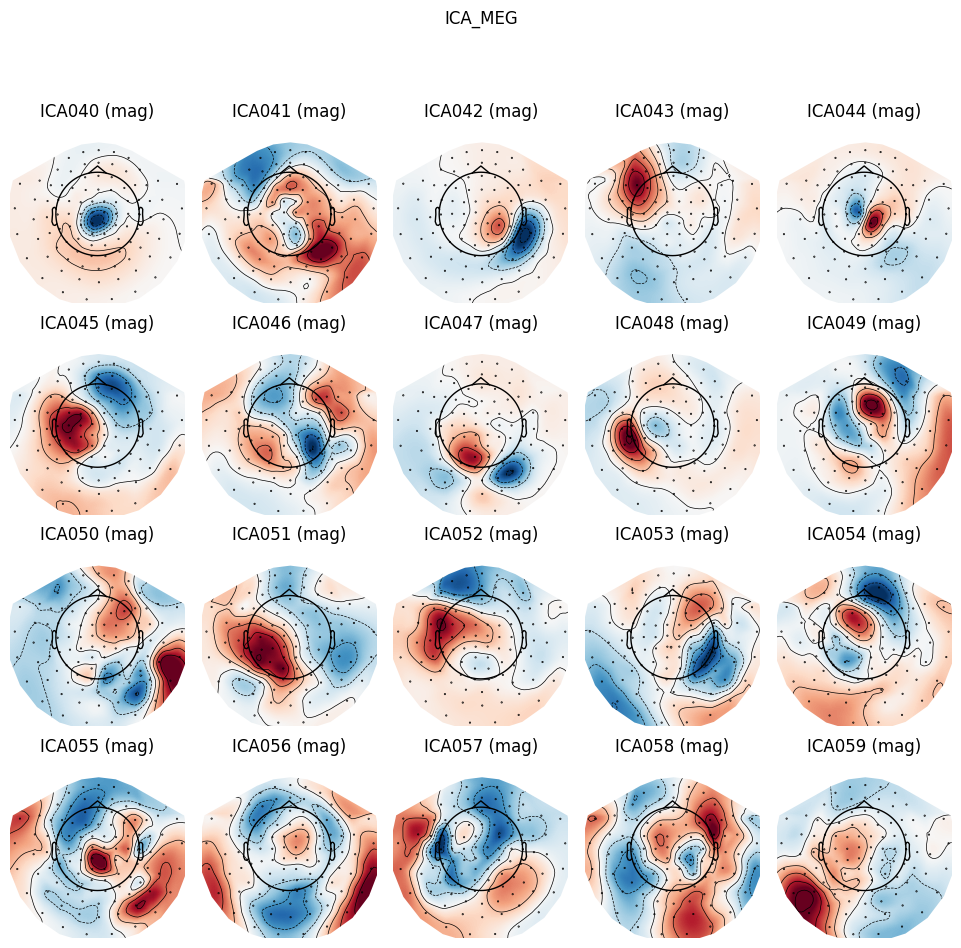

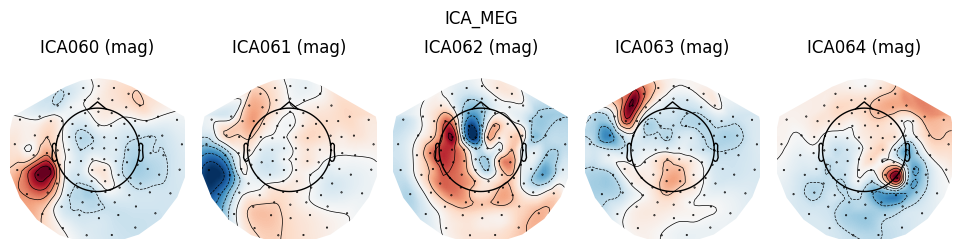

Overwriting existing file.
Writing ICA solution to /data/pt_02774/memory_grid/mg37/mg37ALL-ica_meg.fif...


/tmp/ipykernel_207648/1194223603.py:114: RuntimeWarning: This filename (/data/pt_02774/memory_grid/mg37/mg37ALL-ica_meg.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(ica_fname, overwrite=True)


In [6]:
# %load config.py
"""
===========
Config file
===========

Configurate the parameters of the study.
"""
for subject_id in subject_list[:]:

    # =============================================================================
    # SESSION-SPECIFIC SETTINGS
    # =============================================================================

    # Set filename based on experiment number
    data_path = os.path.join(rawdir,subject_id)
    file_exts = ['%sb07',
                     '%sb08',
                     '%sb09',
                     '%sb10',
                     '%sb11',
                     '%sb12',
                     '%sc01',
                     '%sc02',
                     '%sc03',
                     '%sc04',
                     '%sc05',
                     '%sc06']

    file_names = [f % (subject_id) for f in file_exts]


    # =============================================================================
    # GENERAL SETTINGS
    # =============================================================================

    # Set out_path folder or create it if it doesn't exist
    out_path = op.join(data_path)
    if not op.exists(out_path):
        os.mkdir(out_path)



    # =============================================================================
    # FILTERING AND DOWNSAMPLING SETTINGS
    # =============================================================================

    # Filter and resampling params
    l_freq = 1
    h_freq = 40
    sfreq = 200


    # =============================================================================
    # ICA SETTINGS
    # =============================================================================

    ica_method = 'fastica'
    n_components = 0.99
    max_iter = 800
    random_state = 1688


    # =============================================================================
    # RUN
    # =============================================================================

    
    run_ica(max_iter = max_iter, 
            n_components = n_components, 
            random_state = random_state)